# Testing dataset loading

This notebook contains code that run the pipeline we have created to analyze a set of datasets.

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

In [3]:
from analysis.dataset import load_datasets, compute_ds_col_intersection, clean_datasets, build_dataset, scale_minmax

### Load datasets

In [4]:
# Load dataset
datasets = load_datasets(DATASET_PATH)
# compute intersection
colname_intersection = compute_ds_col_intersection(datasets)
# clean datasets
datasets = clean_datasets(datasets, colname_intersection)

INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO:root:Setting disease as DIABETE


## Scaling

In [5]:
scale_minmax(datasets)

## Building unique DS

In [8]:
# finally build the unique dataset
dataset = build_dataset(datasets)
dataset

,RASAL2,RNF14,C5,TSPYL4,TMEM109,GOSR2,TMEM43,NNT,VPS13C,FBXO5,...,CTBP1,ARHGAP4,WDR74,PROX1,RAPGEF6,GOLGB1,SNRNP200,PRR11,PNKP,RALA
0,0.556184,0.449244,0.026878,0.201962,0.000000,0.408007,0.629577,0.660355,0.739738,0.859315,...,0.873404,0.281715,0.621032,0.714196,0.676059,0.644772,0.526866,1.000000,0.480926,0.243442
1,0.300319,0.856086,0.759252,0.701665,0.449123,0.550269,0.417878,0.649549,0.524726,0.476781,...,0.554926,0.587365,0.000000,0.669198,0.989629,0.539980,0.551326,0.473124,0.000000,0.726285
2,0.631467,0.929334,0.406232,0.792018,0.661140,0.616352,0.387641,0.199840,0.323722,0.235545,...,0.757259,0.758006,0.529242,0.727069,0.603068,0.361406,0.388200,0.090030,0.512093,0.623744
3,0.226030,0.918770,1.000000,0.703524,0.397678,0.545797,0.625244,0.816752,0.303387,1.000000,...,0.351778,0.460613,0.572162,1.000000,0.601653,0.544113,0.357747,0.756736,0.506161,0.667931
4,0.505492,0.580152,0.817695,0.885859,0.392898,0.860151,1.000000,0.786648,0.369560,0.310709,...,0.937004,0.487369,0.044619,0.501823,0.885514,0.460978,0.660097,0.388496,0.332599,0.439031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.214286,0.818919,0.581395,0.117647,0.120069,0.326683,0.410374,0.476605,0.533854,0.494444,...,0.198402,0.755994,0.426471,0.200000,0.487952,0.945995,0.677036,0.397959,0.879334,0.487091
13,0.000000,0.056216,0.000000,1.000000,0.612350,0.670823,1.000000,0.355822,0.130859,0.405556,...,0.579228,0.086037,0.696078,0.200000,0.319277,0.104976,0.220494,0.173469,0.134535,0.127367
14,0.285714,0.045676,0.426357,0.742081,1.000000,1.000000,0.199847,0.252448,0.168945,0.605556,...,1.000000,0.136812,0.862745,0.000000,0.102410,0.013350,0.234218,0.387755,0.220527,0.132530
15,0.071429,0.000000,0.069767,0.900452,0.238422,0.820449,0.289855,0.107726,0.111328,0.350000,...,0.336884,0.000000,0.392157,0.000000,0.147590,0.098301,0.201281,0.091837,0.325936,0.000000


## Inspecting dataset we have built

In [9]:
dataset['DISEASE']

0          GS
1          GS
2          GS
3          GS
4          GS
       ...   
12    DIABETE
13    DIABETE
14    DIABETE
15    DIABETE
16    DIABETE
Name: DISEASE, Length: 399, dtype: object

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

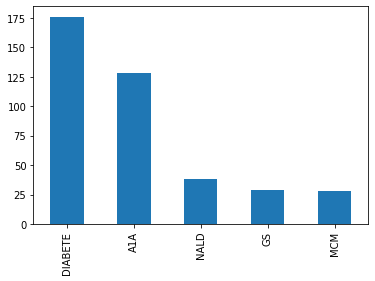

In [10]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

In [ ]:
import matplotlib.pyplot as plt
from bioinfokit import analys, visuz
import numpy as np

In [ ]:
visuz.gene_exp.hmap(df=dataset.astype(float), rowclus=False, colclus=False, dim=(10, 10), tickfont=(2, 4), show=True)